> ## Exploratory Data Analysis of the Used Car Auction Prices dataset
>> ### MDDB Group A - Team 1 - AI Methods for Business
>
>> ### Nadia Aflatounian
>> ### Max Heijmans
>> ### Carl Hümbs
>> ### Can Senturk

<div style="position: relative; background: #6d810f; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #6d810f; padding: 5px 10px; border-radius: 3px;">Section 0</span>
    <h1 style="font-size: 30px;">Business question and sub questions</h1>
</div>

> The goal of this Jupyter notebook and EDA is to answer the business question put forward, namely:
>> Can the dealership use predictive models to identify vehicles with a high resale value? 
>
> Similarly, to help answer the business question holistically, the following sub questions need to be answered:
>> Which specific features in the dataset (such as make, model, year, and condition) are identified by the predictive models as the strongest predictors of high resale value?
>>
>> How do the age and condition of vehicles influence their predicted resale value according to the models? 
>>
>> How do the random forest and neural network models interpret market trends from historical data to predict future resale values of different vehicle types? 
>>
>> How accurately do the predictive models forecast resale values across different segments of vehicles (e.g., luxury vs. economy cars, SUVs vs. sedans) based on the dataset?
>>
>> What insights do the models provide about the influence of regional factors (such as state of sale) on the resale value of vehicles, and how can this information guide a dealership's purchasing decisions? 

<div style="position: relative; background: #6d810f; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #6d810f; padding: 5px 10px; border-radius: 3px;">Section 1</span>
    <h1 style="font-size: 30px;">Importing the necessary libraries and reading the dataset</h1>
</div>

In [1245]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.impute import SimpleImputer

In [1246]:
# Impporting csv file
car_df = pd.read_csv(r"car_prices.csv", delimiter=',', on_bad_lines='skip') # Skipping 17 out of 558812, because of faulty data
df_original_len = len(car_df)
print('Original length of dataframe:', df_original_len)
print("There are {} rows and {} columns in the dataset".format(car_df.shape[0], car_df.shape[1]))

Original length of dataframe: 558811
There are 558811 rows and 16 columns in the dataset


In [1247]:
car_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [1248]:
car_df.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558806,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558810,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,3.4,15008.0,gray,gray,"ford motor credit company,llc pd",29600,26700,Thu May 28 2015 05:30:00 GMT-0700 (PDT)


<div style="position: relative; background: #6d810f; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #6d810f; padding: 5px 10px; border-radius: 3px;">Section 2</span>
    <h1 style="font-size: 30px;">Cleaning the dataset</h1>
</div>

In [1249]:
#renaming 'make' to 'brand' for easier understanding
car_df.rename(columns={'make': 'brand'}, inplace=True)

In [1250]:
#Accessing column names
car_df.columns.values

array(['year', 'brand', 'model', 'trim', 'body', 'transmission', 'vin',
       'state', 'condition', 'odometer', 'color', 'interior', 'seller',
       'mmr', 'sellingprice', 'saledate'], dtype=object)

In [1251]:
#Getting dataframe information
car_df.info()

# Calculate the percentage of missing values for each column
missing_percentage = car_df.isnull().mean() * 100

# Display the missing percentages
print(missing_percentage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   brand         548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB
year             0.000000
brand  

In [1252]:
# Select columns with object or category data type
categorical_columns = car_df.select_dtypes(include=['object']).columns

# Describe only the categorical columns
car_df[categorical_columns].describe()


,brand,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811,558811
unique,96,973,1975,86,2,550296,38,20,17,14264,3745
top,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475914,5,82945,110970,244325,19693,5334


In [1253]:
#Generating descriptive statistics upfront
car_df.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [1254]:
#Getting all columns with numerical data
numerical_col = car_df.select_dtypes(['int64', 'float64']).columns
print("The numerical columns are:")
print(numerical_col)

The numerical columns are:
Index(['year', 'condition', 'odometer', 'mmr', 'sellingprice'], dtype='object')


In [1255]:
#Getting all columns with categorical data
cat_col = car_df.select_dtypes([object]).columns
print("The categorical columns are:")
print(cat_col)

The categorical columns are:
Index(['brand', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'color', 'interior', 'seller', 'saledate'],
      dtype='object')


In [1256]:
car_df[cat_col].describe()

,brand,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811,558811
unique,96,973,1975,86,2,550296,38,20,17,14264,3745
top,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475914,5,82945,110970,244325,19693,5334


#### Observations on Categoricals:

- ##### The transmission column is predominantly populated by vehicles with automatic transmission (more than 50%).
- ##### The vin, seller, saledate columns have high cardinality (a high number of unique values).
- ##### The color and interior columns are dominated by vehicles with black exterior and interior colours (more than 20%).
- ##### The brand column is predominantly populated by Ford vehicles (more than 15%).

In [1257]:
car_df[numerical_col].describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


#### Observations on Numericals:

- ##### The columns year, condition, odometer have no issues with their min/max values.
- ##### All column values still fall within reasonable ranges.
- ##### There are differences between the mean and median in the columns year, condition, odometer, mmr, selling price, suggesting potential variations.
- ##### Further review is necessary for the mmr column in preprocessing as the minimum value range is considerably distant from the mean and median.
- ##### An anomaly exists in the minimum selling price, suspected to be unknown data, thus imputed with a value of 1 or vehicles sold as part of a corporate program (gifts).

> #### Counting values

In [1258]:
for col in cat_col:
    print(f'''Value count columns {col}:''')
    print(car_df[col].value_counts())
    print()

Value count columns brand:
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
airstream         1
ford tk           1
chev truck        1
hyundai tk        1
Lotus             1
Name: brand, Length: 96, dtype: int64

Value count columns model:
Altima        19349
F-150         14479
Fusion        12946
Camry         12545
Escape        11861
              ...  
rrs               1
golf              1
g500              1
tahoe             1
458 Italia        1
Name: model, Length: 973, dtype: int64

Value count columns trim:
Base                 55817
SE                   43648
LX                   20757
Limited              18356
LT                   16915
                     ...  
xls                      1
4x2 reg silverado        1
awd v8 limited           1
4x2 v6 limited           1
Power Wagon              1
Name: trim, Length: 1975, dtype: int64

Value count columns body:
Sedan          199437
SUV            1

In [1259]:
# Iterate through each column and display the count of unique values
for column in car_df.columns:
    unique_count = car_df[column].nunique()
    print(f"Count of unique values in '{column}' column: {unique_count}")

Count of unique values in 'year' column: 34
Count of unique values in 'brand' column: 96
Count of unique values in 'model' column: 973
Count of unique values in 'trim' column: 1975
Count of unique values in 'body' column: 86
Count of unique values in 'transmission' column: 2
Count of unique values in 'vin' column: 550296
Count of unique values in 'state' column: 38
Count of unique values in 'condition' column: 41
Count of unique values in 'odometer' column: 172277
Count of unique values in 'color' column: 20
Count of unique values in 'interior' column: 17
Count of unique values in 'seller' column: 14264
Count of unique values in 'mmr' column: 1101
Count of unique values in 'sellingprice' column: 1887
Count of unique values in 'saledate' column: 3745


#### Descriptive Statistics Observations:

- ##### The dataset comprises 558,811 rows and 16 columns.
- ##### here are no issues found with the names and content of each column.
- ##### Several columns still contain null/missing values: brand, model, trim, body, transmission, condition, odometer, color, interior.
- ##### The largest count of missing values is in the transmission column, totaling 65,353 entries (11.7% of the data).
- ##### It appears that there are no evident issues with the data types in each column (they are already appropriate).

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>vin</b></font></div>

In [1260]:
#Find duplicate VINs
duplicate_vins = car_df[car_df.duplicated(subset='vin', keep=False)]

In [1261]:
#Aggregate rows for duplicate VINs
if not duplicate_vins.empty:
    aggregated_data = duplicate_vins.groupby('vin').agg({
        'sellingprice': 'mean',  #Aggregate selling prices (you can choose other aggregate functions)
        'odometer': 'mean',      #Aggregate odometer readings
        #Add more columns to aggregate as needed
    }).reset_index()

    #Display the aggregated data for duplicate VINs
    print(aggregated_data)
else:
    print("No cars sold more than once.")

                    vin  sellingprice  odometer
0     19uua5663ya022038        1050.0  105425.5
1     19uua65596a059705        8350.0   89701.0
2     19uua66215a070166        7350.0  131726.0
3     19uua66228a015410       10350.0   91839.0
4     19uua66228a024043       12850.0   78782.5
...                 ...           ...       ...
8321  zamce39a370028781       25150.0   39039.5
8322  zamce39a460025306       15500.0   92555.5
8323  zamce39a470026893       23250.0   46107.5
8324  zamfe39a970030502       30250.0   27925.5
8325  zfbcfabh4ez025834       10850.0   11474.0

[8326 rows x 3 columns]


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Missing Values</b></font></div>

#### Handling missing Values:
- ##### Imputing categorical values according to the most frequent likely category
- ##### Imputing numerical values according to either mode, mean or mode
- ##### The columns year, vin, state, seller, mmr, saledate, and sellingprice do not have any missing values, so there's no need for handling them.

In [1262]:
#Checking for missing values
missing_values_count = car_df.isnull().sum()
missing_values_percentage = (missing_values_count / len(car_df)) * 100

missing_data_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage
})

missing_data_summary = missing_data_summary.sort_values(by='Missing Values Count', ascending=False)

print("Missing values in each column:")
print(missing_data_summary)

Missing values in each column:
              Missing Values Count  Missing Values Percentage
transmission                 65353                  11.695010
body                         13195                   2.361263
condition                    11794                   2.110553
trim                         10651                   1.906011
model                        10399                   1.860915
brand                        10301                   1.843378
color                          749                   0.134035
interior                       749                   0.134035
odometer                        94                   0.016821
year                             0                   0.000000
vin                              0                   0.000000
state                            0                   0.000000
seller                           0                   0.000000
mmr                              0                   0.000000
sellingprice                     0     

In [1263]:
# Define the columns to impute
columns_to_impute = ['transmission', 'brand', 'model', 'body', 'trim']

# Create a SimpleImputer instance
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on the selected columns
car_df[columns_to_impute] = imputer.fit_transform(car_df[columns_to_impute])


### 2.1 Imputing missing values for 'condition'

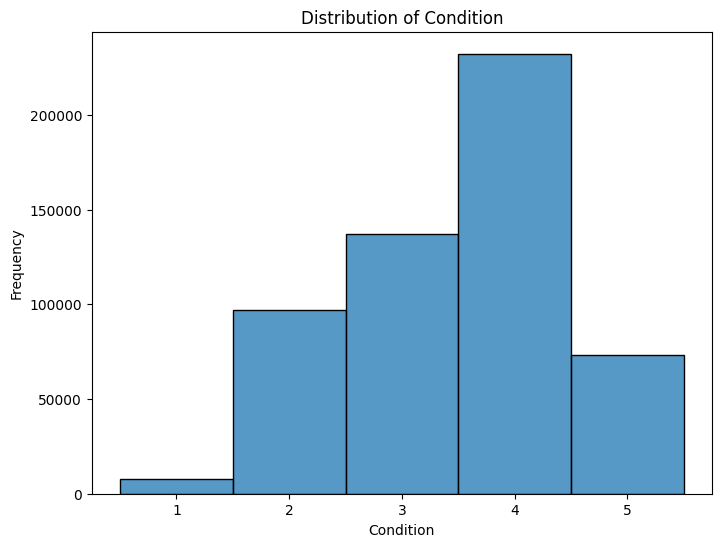

In [1264]:
# Plotting the distribution of 'condition'
plt.figure(figsize=(8, 6))
sns.histplot(car_df['condition'].dropna(), discrete=True)
plt.title('Distribution of Condition')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.show()

As the data is numeric it appears to be normally distributed, we will use the Mean to imoute the missing values:

In [1265]:
# Impute missing values in the 'condition' column with the mean
condition_mean = car_df['condition'].mean()
car_df['condition'].fillna(condition_mean, inplace=True)

# Check if there are any remaining missing values
missing_values_after_imputation = car_df['condition'].isnull().sum()
print("Missing values in 'condition' after imputation:", missing_values_after_imputation)

Missing values in 'condition' after imputation: 0


### 2.2 Imputing missing values for 'odometer'

Plotting the distribution of condition and odemeter, to see if we should use mean or meadian to impute the missing values.

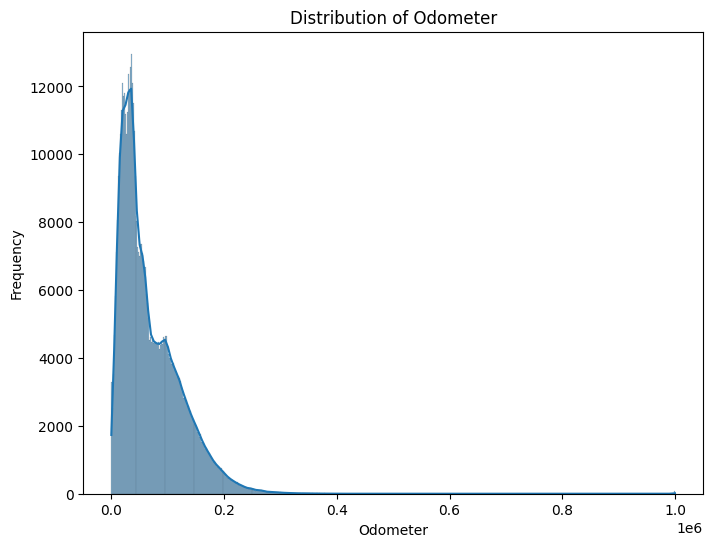

In [1266]:
# Plotting the distribution of 'odometer'
plt.figure(figsize=(8, 6))
sns.histplot(car_df['odometer'].dropna(), kde=True)
plt.title('Distribution of Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

As the data is numeric it appears to be skewed to the left, we will use the Median to imoute the missing values:

In [1267]:
# Impute missing values in the 'odometer' column with the median
odometer_median = car_df['odometer'].median()
car_df['odometer'].fillna(odometer_median, inplace=True)

# Check if there are any remaining missing values
missing_values_after_imputation = car_df['odometer'].isnull().sum()
print("Missing values in 'odometer' after imputation:", missing_values_after_imputation)

Missing values in 'odometer' after imputation: 0


### 2.3 Imputing missing values for 'color'

In [1268]:
print("Data type of 'interior' column:", car_df['color'].dtype)

Data type of 'interior' column: object


As 'color' is a categorical variable, we use Mode to impute missing values:

In [1269]:
# Calculate the mode of the 'color' column
color_mode = car_df['color'].mode()[0]

# Fill missing values in the 'color' column with the mode
car_df['color'].fillna(color_mode, inplace=True)

# Check if there are any remaining missing values
missing_values_after_imputation = car_df['color'].isnull().sum()
print("Missing values in 'color' after imputation:", missing_values_after_imputation)

Missing values in 'color' after imputation: 0


### 2.4 Imputing missing values for 'interior'

In [1270]:
print("Data type of 'interior' column:", car_df['interior'].dtype)

Data type of 'interior' column: object


As 'interior' is a categorical variable, we use Mode to impute missing values:

In [1271]:
# Calculate the mode of the 'interior' column
interior_mode = car_df['interior'].mode()[0]

# Fill missing values in the 'interior' column with the mode
car_df['interior'].fillna(interior_mode, inplace=True)

# Check if there are any remaining missing values
missing_values_after_imputation = car_df['interior'].isnull().sum()
print("Missing values in 'interior' after imputation:", missing_values_after_imputation)

Missing values in 'interior' after imputation: 0


### Finally: checking if there are still empty values left:

In [1272]:
#Checking for null values again to check the previous code
car_df.isna().sum().sort_values(ascending=False)

year            0
brand           0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Mapping and capitalising columns</b></font></div>

##### We've observed inconsistencies in the way brand names are written—some are in abbreviations or lack proper capitalisation. By mapping these brand names, we aim to unify them for consistency and ensure they are uniformly represented.

In [1273]:
mapping_dict = {
    'brand': {'vw': 'Volkswagen', 'ford tk': 'Ford', 'ford truck': 'Ford', 'chev truck': 'Chevrolet',
              'dodge tk': 'Dodge', 'hyundai tk': 'Hyundai', 'bmw': 'BMW', 'mercedes-b': 'Mercedes-Benz',
              'mercedes': 'Mercedes-Benz', 'gmc': 'GMC', 'gmc truck': 'GMC', 'mazda tk': 'Mazda', 
              'landrover': 'Land Rover'},
    'body': {'Suv': 'SUV', 'Supercrew': 'SuperCrew', 'Regular-Cab': 'Regular Cab'}
}

#Apply mapping to the specified columns in the 'car_df' DataFrame
for column, mapping in mapping_dict.items():
    car_df[column] = car_df[column].replace(mapping)

#Example usage:
car_df['brand'] = car_df['brand'].replace(mapping_dict['brand'])
car_df['body'] = car_df['body'].replace(mapping_dict['body'])


In [1274]:
#Function for capitalising
def capitalise(df, columns):
    for column in columns:
        df[column] = df[column].apply(lambda x: ' '.join(word.capitalize() for word in x.split()))
    return df

In [1275]:
# List of columns to capitalise
columns_to_capitalise = ['brand', 'model', 'trim', 'body', 'transmission', 'color', 'seller']

# Apply capitalisation to the specified columns in the 'car_df' DataFrame
car_df = capitalise(car_df, columns_to_capitalise)

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Duplicates</b></font></div>

In [1276]:
#Checking duplicates
duplicates = car_df.duplicated().sum()
if duplicates == 0:
    print("There are " + str(duplicates) + " in the dataset")
else:
    print("There are" + str(duplicates) + "in the dataset")
# print("Duplicate values: " + str(duplicates))

There are 0 in the dataset


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>new_saledate_format</b></font></div>

In [1277]:
from datetime import datetime

# Clean 'saledate' column and convert to datetime
car_df['saledate'] = pd.to_datetime(car_df['saledate'].str.replace(r' GMT[-+]\d{4} \(\w{3}\)', '', regex=True).str.strip(), errors='coerce')

# Create 'new_saledate_format' column with desired format
car_df['new_saledate_format'] = car_df['saledate'].dt.strftime('%b %Y')

# Extract date part and calculate time span
car_df['date_part'] = pd.to_datetime(car_df['saledate'].dt.strftime('%Y-%m-%d'), errors='coerce')
min_date = car_df['date_part'].min()
max_date = car_df['date_part'].max()

# Display date information
print(car_df[['saledate', 'new_saledate_format']])
print(car_df[['saledate', 'date_part']])
print(f"Min Date: {min_date}\nMax Date: {max_date}\nTime Span: {max_date - min_date}")

                  saledate new_saledate_format
0      2014-12-16 12:30:00            Dec 2014
1      2014-12-16 12:30:00            Dec 2014
2      2015-01-15 04:30:00            Jan 2015
3      2015-01-29 04:30:00            Jan 2015
4      2014-12-18 12:30:00            Dec 2014
...                    ...                 ...
558806 2015-07-09 07:00:00            Jul 2015
558807 2015-07-08 09:30:00            Jul 2015
558808 2015-07-08 09:30:00            Jul 2015
558809 2015-07-09 06:45:00            Jul 2015
558810 2015-05-28 05:30:00            May 2015

[558811 rows x 2 columns]
                  saledate  date_part
0      2014-12-16 12:30:00 2014-12-16
1      2014-12-16 12:30:00 2014-12-16
2      2015-01-15 04:30:00 2015-01-15
3      2015-01-29 04:30:00 2015-01-29
4      2014-12-18 12:30:00 2014-12-18
...                    ...        ...
558806 2015-07-09 07:00:00 2015-07-09
558807 2015-07-08 09:30:00 2015-07-08
558808 2015-07-08 09:30:00 2015-07-08
558809 2015-07-09 06:45:00 20

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>care_age</b></font></div>

In [1278]:
# Extract the year of sale from 'saledate' and convert to datetime if not already in datetime format
car_df['saledate'] = pd.to_datetime(car_df['saledate'], errors='coerce')
car_df['year_of_sale'] = car_df['saledate'].dt.year

# Assuming the column 'manufacture_year' represents the year of manufacture
# Calculate 'car_age' by subtracting the manufacture year from the year of sale
car_df['car_age'] = car_df['year_of_sale'] - car_df['year']

# Display the DataFrame with the newly added 'car_age' column
print(car_df[['saledate', 'year', 'year_of_sale', 'car_age']])

                  saledate  year  year_of_sale  car_age
0      2014-12-16 12:30:00  2015          2014       -1
1      2014-12-16 12:30:00  2015          2014       -1
2      2015-01-15 04:30:00  2014          2015        1
3      2015-01-29 04:30:00  2015          2015        0
4      2014-12-18 12:30:00  2014          2014        0
...                    ...   ...           ...      ...
558806 2015-07-09 07:00:00  2015          2015        0
558807 2015-07-08 09:30:00  2012          2015        3
558808 2015-07-08 09:30:00  2012          2015        3
558809 2015-07-09 06:45:00  2015          2015        0
558810 2015-05-28 05:30:00  2014          2015        1

[558811 rows x 4 columns]


In [1279]:
# Filter the DataFrame for rows where 'car_age' is less than 0 and count the occurrences
negative_car_age_count = (car_df['car_age'] < 0).sum()

# Display the count of rows where 'car_age' is less than 0
print(f"Number of rows where car_age is less than 0: {negative_car_age_count}")

Number of rows where car_age is less than 0: 201


In [1280]:
# Filter the DataFrame to keep rows where 'car_age' is greater than or equal to 0
car_df = car_df[car_df['car_age'] >= 0]

In [1281]:
# Count of rows in the DataFrame after dropping rows with negative 'car_age'
row_count = len(car_df)
print(f"New row count: {row_count}")

New row count: 558610


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>mileage_per_year</b></font></div>

In [1282]:
import datetime

# Assuming 'year' represents the year of the car and 'odometer' represents the odometer reading
# Calculate current year for reference
current_year = datetime.datetime.now().year

# Calculate car age by subtracting 'year' from the current year
car_df['car_age'] = current_year - car_df['year']

# Calculate mileage per year by dividing odometer reading by car age
car_df['mileage_per_year'] = car_df['odometer'] / car_df['car_age']


In [1283]:
car_df.head()

,year,brand,model,trim,body,transmission,vin,state,condition,odometer,...,interior,seller,mmr,sellingprice,saledate,new_saledate_format,date_part,year_of_sale,car_age,mileage_per_year
2,2014,Bmw,3 Series,328i Sulev,Sedan,Automatic,wba3c1c51ek116351,ca,4.5,1331.0,...,black,Financial Services Remarketing (lease),31900,30000,2015-01-15 04:30:00,Jan 2015,2015-01-15,2015,9,147.888889
3,2015,Volvo,S60,T5,Sedan,Automatic,yv1612tb4f1310987,ca,4.1,14282.0,...,black,Volvo Na Rep/world Omni,27500,27750,2015-01-29 04:30:00,Jan 2015,2015-01-29,2015,8,1785.250000
4,2014,Bmw,6 Series Gran Coupe,650i,Sedan,Automatic,wba6b2c57ed129731,ca,4.3,2641.0,...,black,Financial Services Remarketing (lease),66000,67000,2014-12-18 12:30:00,Dec 2014,2014-12-18,2014,9,293.444444
6,2014,Bmw,M5,Base,Sedan,Automatic,wbsfv9c51ed593089,ca,3.4,14943.0,...,black,The Hertz Corporation,69000,65000,2014-12-17 12:30:00,Dec 2014,2014-12-17,2014,9,1660.333333
7,2014,Chevrolet,Cruze,1lt,Sedan,Automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,...,black,Enterprise Vehicle Exchange / Tra / Rental / T...,11900,9800,2014-12-16 13:00:00,Dec 2014,2014-12-16,2014,9,3179.666667


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>market-price-deviation</b></font></div>

In [1284]:
# Calculate deviation by subtracting 'mmr' from 'sellingprice'
car_df['market_price_deviation'] = car_df['sellingprice'] - car_df['mmr']

# Display the DataFrame with the added 'market_price_deviation' column
print(car_df[['mmr', 'sellingprice', 'market_price_deviation']])

          mmr  sellingprice  market_price_deviation
2       31900         30000                   -1900
3       27500         27750                     250
4       66000         67000                    1000
6       69000         65000                   -4000
7       11900          9800                   -2100
...       ...           ...                     ...
558806  35300         33000                   -2300
558807  30200         30800                     600
558808  29800         34000                    4200
558809  15100         11100                   -4000
558810  29600         26700                   -2900

[558610 rows x 3 columns]


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Cleaning Colours</b></font></div>

In [1285]:
def clean_colours(df):
    #Define a function to clean colours for both 'color' and 'interior' columns
    def clean_colour_data(col):
        #Define mapping for similar colours to be merged
        similar_colours = {
            'burgundy': 'red',
            'charcoal': 'black',  #Merging similar colours
            'off-white': 'white',  #Merging similar colours
            '—': 'Other',  #Replacing '—' with 'Other'
        }

        #Merge similar colours and categorise low-frequency colours
        col.replace(similar_colours, inplace=True)

    #Clean 'color' column
    clean_colour_data(df['color'])

    #Clean 'interior' column
    clean_colour_data(df['interior'])

In [1286]:
# Display unique values in the 'color' column before cleaning and add whitespace
unique_colours_before_cleaning = car_df['color'].unique()
print(f"{unique_colours_before_cleaning}\n")

# Display count of each unique value in the 'color' column before cleaning
colour_counts_before_cleaning = car_df['color'].value_counts()
print(colour_counts_before_cleaning)

['Gray' 'White' 'Black' 'Red' 'Blue' 'Silver' 'Brown' 'Beige' '—' 'Gold'
 'Yellow' 'Green' 'Burgundy' 'Charcoal' 'Purple' 'Orange' 'Off-white'
 'Turquoise' 'Pink' 'Lime']

Black        111682
White        106625
Silver        83358
Gray          82817
Blue          51127
Red           43557
—             24680
Green         11382
Gold          11341
Beige          9217
Burgundy       8969
Brown          6714
Orange         2077
Purple         1559
Off-white      1448
Yellow         1285
Charcoal        479
Turquoise       236
Pink             42
Lime             15
Name: color, dtype: int64


In [1287]:
#Display unique values in the 'color' column before cleaning
unique_interiors_before_cleaning = car_df['interior'].unique()
print(f"{unique_interiors_before_cleaning}\n")

#Display unique values in the 'color' column before cleaning
count_interiors_before_cleaning = car_df['interior'].value_counts()
print(count_interiors_before_cleaning)

['black' 'beige' 'brown' 'gray' '—' 'burgundy' 'tan' 'white' 'silver'
 'off-white' 'blue' 'red' 'yellow' 'green' 'purple' 'orange' 'gold']

black        244965
gray         178527
beige         59739
tan           44084
—             17067
brown          8638
red            1357
blue           1138
silver         1099
off-white       480
purple          339
gold            324
white           252
green           245
burgundy        191
orange          145
yellow           20
Name: interior, dtype: int64


In [1288]:
#Applying the function to map colours in 'color' and 'interior' columns
clean_colours(car_df)

In [1289]:
# Display unique colours after cleaning in the 'color' column
unique_colours_after_cleaning = car_df['color'].unique()
print("Unique colours after cleaning:")
print(unique_colours_after_cleaning)

# Display count of each unique colour after cleaning in the 'color' column
colour_counts_after_cleaning = car_df['color'].value_counts()
print("\nCount of each unique colour after cleaning:")
print(colour_counts_after_cleaning)

# Display unique interior colours after cleaning in the 'interior' column
unique_interiors_after_cleaning = car_df['interior'].unique()
print("\nUnique interior colours after cleaning:")
print(unique_interiors_after_cleaning)

# Display count of each unique interior colour after cleaning in the 'interior' column
count_interiors_after_cleaning = car_df['interior'].value_counts()
print("\nCount of each interior colour after cleaning:")
print(count_interiors_after_cleaning)

Unique colours after cleaning:
['Gray' 'White' 'Black' 'Red' 'Blue' 'Silver' 'Brown' 'Beige' 'Other'
 'Gold' 'Yellow' 'Green' 'Burgundy' 'Charcoal' 'Purple' 'Orange'
 'Off-white' 'Turquoise' 'Pink' 'Lime']

Count of each unique colour after cleaning:
Black        111682
White        106625
Silver        83358
Gray          82817
Blue          51127
Red           43557
Other         24680
Green         11382
Gold          11341
Beige          9217
Burgundy       8969
Brown          6714
Orange         2077
Purple         1559
Off-white      1448
Yellow         1285
Charcoal        479
Turquoise       236
Pink             42
Lime             15
Name: color, dtype: int64

Unique interior colours after cleaning:
['black' 'beige' 'brown' 'gray' 'Other' 'red' 'tan' 'white' 'silver'
 'blue' 'yellow' 'green' 'purple' 'orange' 'gold']

Count of each interior colour after cleaning:
black     244965
gray      178527
beige      59739
tan        44084
Other      17067
brown       8638
red         1

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>brand_model</b></font></div>

In [1300]:
# Create a new column 'Brand_Model_Combination' by concatenating 'brand' and 'model'
car_df['brand_model'] = car_df['brand'] + '_' + car_df['model']

# Display the new column
print(car_df['brand_model'])

2                    Bmw_3 Series
3                       Volvo_S60
4         Bmw_6 Series Gran Coupe
6                          Bmw_M5
7                 Chevrolet_Cruze
                   ...           
558806                   Kia_K900
558807                   Ram_2500
558808                     Bmw_X5
558809              Nissan_Altima
558810                 Ford_F-150
Name: brand_model, Length: 558610, dtype: object


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>brand_model</b></font></div>

In [1290]:
# #After all the chagnes to the dataset, updating the numerical and categorical column variables
# num_update = ['year', 'condition', 'odometer', 'sellingprice']
# cat_update = ['brand', 'model', 'trim', 'body', 'transmission', 'color', 'saledate', 'seller']

# print(num_update)
# print(cat_update)

In [1291]:
# #Checking data types for every column
# print("Data types in this dataset are:")
# print(car_df.dtypes)

> __Adding top 20 columns for all categorical columns (maybe useful later)__ 

In [1292]:
# #Making a function to put the column in the top 20, if not it will be put into the others category
# def top_20_categorical(df, column_name):
#     #Determine the top 20 most frequent values in the specified column
#     top_20_values = df[column_name].value_counts().head(20).index.tolist()
    
#     #Define a function to categorise values based on top 20 or 'Others'
#     def categorise(value):
#         if value in top_20_values:  #Check if the value is in the top 20
#             return value  #Keep the original value if it's in the top 20
#         else:
#             return 'Others'  #Assign 'Others' if the value is not in the top 20
    
#     #Create a new column by categorising values based on the defined function
#     df[f'top_20_{column_name}'] = df[column_name].apply(categorise)

> __Brand column__

In [1293]:
# print(car_df['brand'].unique())
# print(len(car_df['brand'].unique()))

In [1294]:
# top_20_categorical(car_df, 'brand')

> __Body column__

In [1295]:
# car_df['body'] = car_df['body']
# print(car_df['body'].unique())
# print(len(car_df['body'].unique()))

In [1296]:
# print(car_df['body'].count())

In [1297]:
# top_20_categorical(car_df, 'body')

In [1298]:
car_df.head()

,year,brand,model,trim,body,transmission,vin,state,condition,odometer,...,seller,mmr,sellingprice,saledate,new_saledate_format,date_part,year_of_sale,car_age,mileage_per_year,market_price_deviation
2,2014,Bmw,3 Series,328i Sulev,Sedan,Automatic,wba3c1c51ek116351,ca,4.5,1331.0,...,Financial Services Remarketing (lease),31900,30000,2015-01-15 04:30:00,Jan 2015,2015-01-15,2015,9,147.888889,-1900
3,2015,Volvo,S60,T5,Sedan,Automatic,yv1612tb4f1310987,ca,4.1,14282.0,...,Volvo Na Rep/world Omni,27500,27750,2015-01-29 04:30:00,Jan 2015,2015-01-29,2015,8,1785.250000,250
4,2014,Bmw,6 Series Gran Coupe,650i,Sedan,Automatic,wba6b2c57ed129731,ca,4.3,2641.0,...,Financial Services Remarketing (lease),66000,67000,2014-12-18 12:30:00,Dec 2014,2014-12-18,2014,9,293.444444,1000
6,2014,Bmw,M5,Base,Sedan,Automatic,wbsfv9c51ed593089,ca,3.4,14943.0,...,The Hertz Corporation,69000,65000,2014-12-17 12:30:00,Dec 2014,2014-12-17,2014,9,1660.333333,-4000
7,2014,Chevrolet,Cruze,1lt,Sedan,Automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,...,Enterprise Vehicle Exchange / Tra / Rental / T...,11900,9800,2014-12-16 13:00:00,Dec 2014,2014-12-16,2014,9,3179.666667,-2100


<div style="position: relative; background: #6d810f; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #6d810f; padding: 5px 10px; border-radius: 3px;">Section 3</span>
    <h1 style="font-size: 30px;">Limiting the number of unique values</h1>
</div>

### <font color='gold'>**For each column we should decide how to limit the number of unique values **</font>:

- For `brand model` and `trim` it is normal to have large number
- Create a new feature `Brand-Model Combination`
- For `budy` type, `state` and `seller` plot them based on frequency and keep most the repetitive ones and replace the value of the rest to `Other` 
- For `vin` we can check how many cars are sold more than once and aggregate those rows 
- For `color` and `interior` we can merge similar colors and for low frequent colors replace them with `other`

=--
- Convert correct `saledate` to correct format and just keep `month` and `day` and `year`
- Create a new feature `car_age` with `year` and `saledate` 

GPT Suggestions for other features: 
- Mileage per Year (from `year` and `odometer`): High mileage can decrease a car's value. Calculate the average annual mileage by dividing the odometer reading by the car's age. This accounts for the car's usage intensity.
- Market Price Deviation (from `mmr` - `Market Price` and `sellingprice`): You could calculate the deviation of the selling price from the market price (mmr) as a feature, which might help in understanding how prices vary from the expected market value.

In [1299]:
# car_df.head()

,year,brand,model,trim,body,transmission,vin,state,condition,odometer,...,seller,mmr,sellingprice,saledate,new_saledate_format,date_part,year_of_sale,car_age,mileage_per_year,market_price_deviation
2,2014,Bmw,3 Series,328i Sulev,Sedan,Automatic,wba3c1c51ek116351,ca,4.5,1331.0,...,Financial Services Remarketing (lease),31900,30000,2015-01-15 04:30:00,Jan 2015,2015-01-15,2015,9,147.888889,-1900
3,2015,Volvo,S60,T5,Sedan,Automatic,yv1612tb4f1310987,ca,4.1,14282.0,...,Volvo Na Rep/world Omni,27500,27750,2015-01-29 04:30:00,Jan 2015,2015-01-29,2015,8,1785.250000,250
4,2014,Bmw,6 Series Gran Coupe,650i,Sedan,Automatic,wba6b2c57ed129731,ca,4.3,2641.0,...,Financial Services Remarketing (lease),66000,67000,2014-12-18 12:30:00,Dec 2014,2014-12-18,2014,9,293.444444,1000
6,2014,Bmw,M5,Base,Sedan,Automatic,wbsfv9c51ed593089,ca,3.4,14943.0,...,The Hertz Corporation,69000,65000,2014-12-17 12:30:00,Dec 2014,2014-12-17,2014,9,1660.333333,-4000
7,2014,Chevrolet,Cruze,1lt,Sedan,Automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,...,Enterprise Vehicle Exchange / Tra / Rental / T...,11900,9800,2014-12-16 13:00:00,Dec 2014,2014-12-16,2014,9,3179.666667,-2100


### 3.1 Creating a new column that combines 'brand' and 'model'

### 3.2 Cleaning the states aka looking at frequency

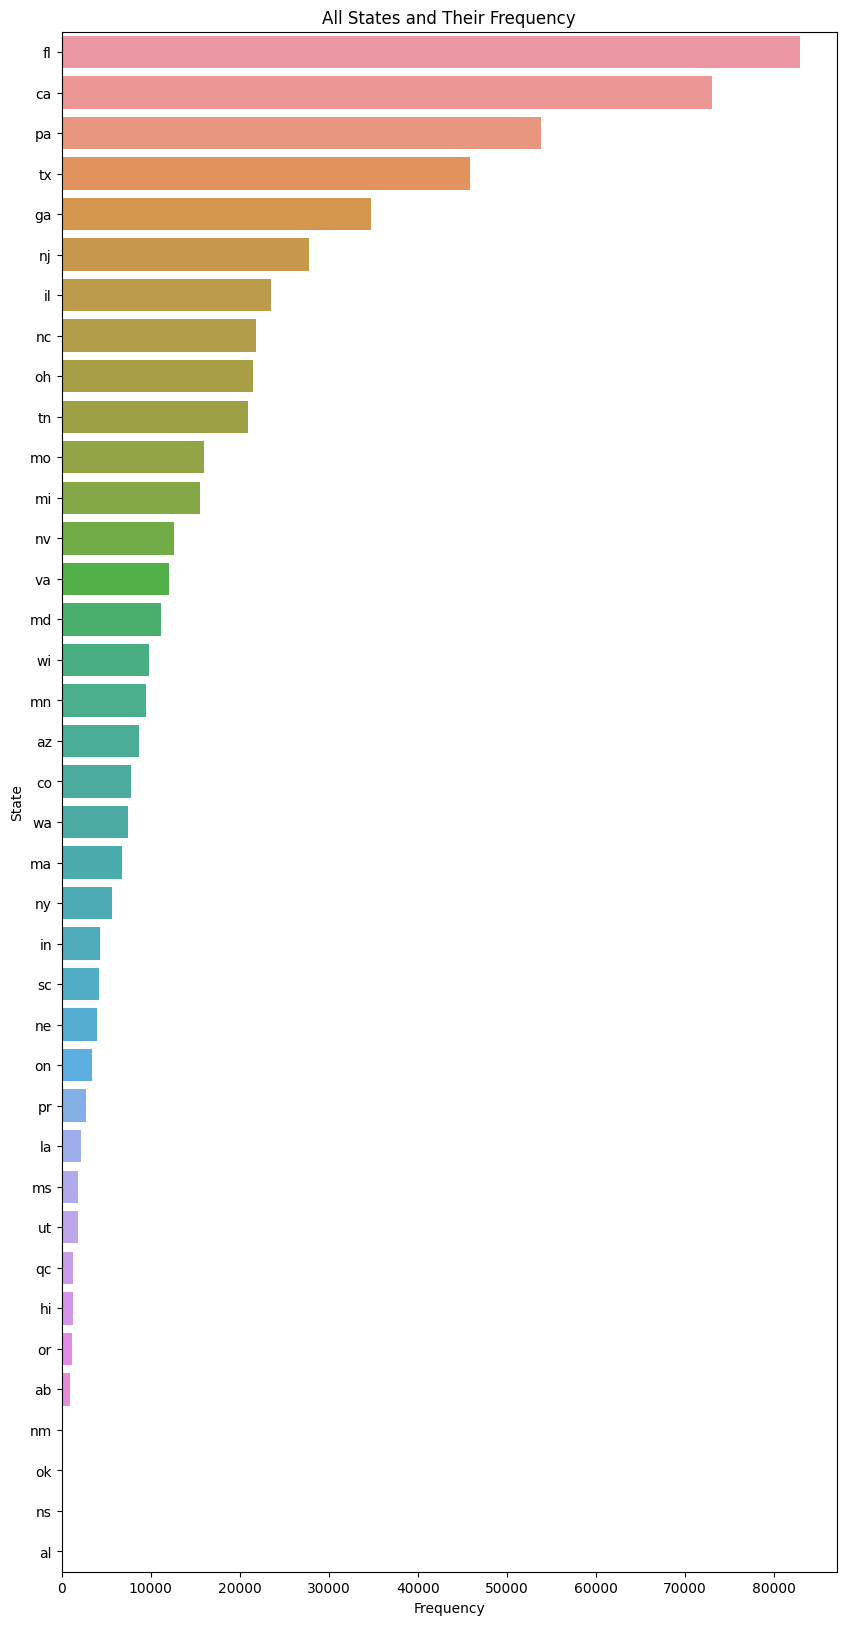

In [1301]:
plt.figure(figsize=(10, 20))

# Plotting all states based on frequency
sns.countplot(y='state', data=car_df, order=car_df['state'].value_counts().index)
plt.title('All States and Their Frequency')
plt.xlabel('Frequency')
plt.ylabel('State')
plt.show()

As we see, these are just 38 states, so we can keeep all of them.

### 3.3 Cleaning 'body' column: identifying most frequently sold body styles

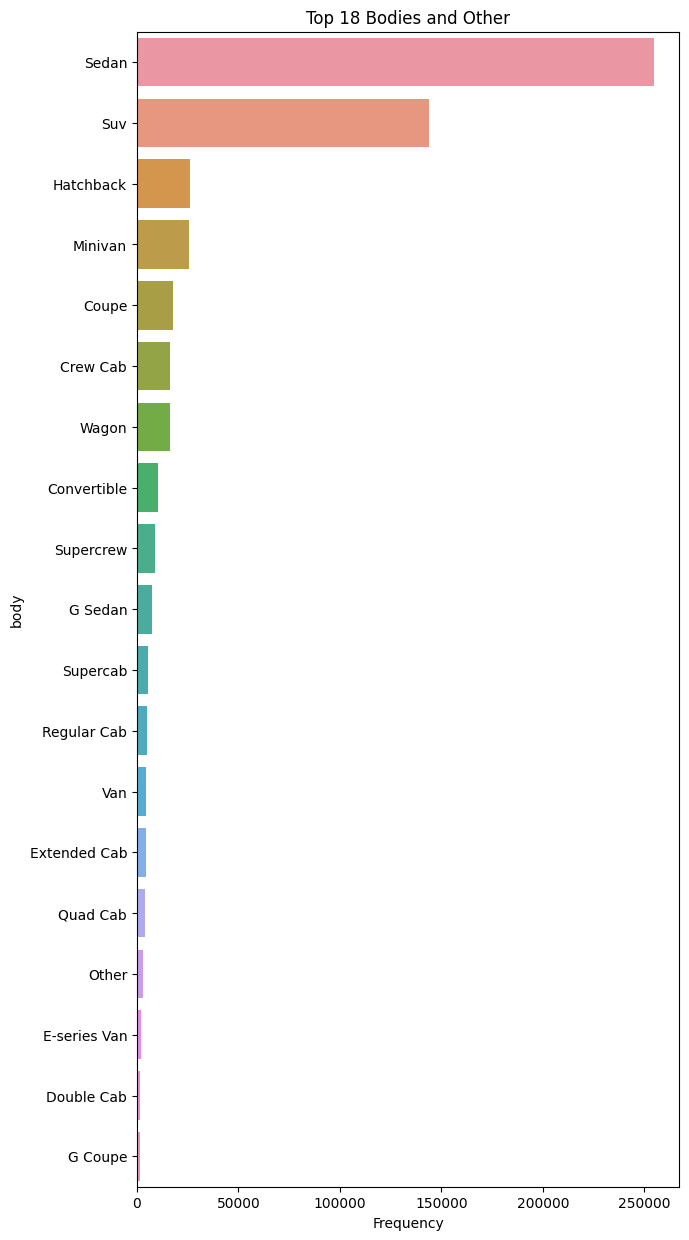

In [1302]:
plt.figure(figsize=(7, 15))

# Selecting the top 50 sellers by frequency
top_18_bodies = car_df['body'].value_counts().nlargest(18).index.tolist()


# Updating sellers that are not in the top 50 to 'Other' in the DataFrame
car_df['body'] = car_df['body'].apply(lambda x: x if x in top_18_bodies else 'Other')


# Plotting the top 50 sellers based on frequency
sns.countplot(y='body', data=car_df, order=car_df['body'].value_counts().index)
plt.title('Top 18 Bodies and Other')
plt.xlabel('Frequency')
plt.ylabel('body')
plt.show()

In [1303]:
## to be done: map the similar body types together

### 3.4 Cleaning the 'sellers': Only looking at the top sellers

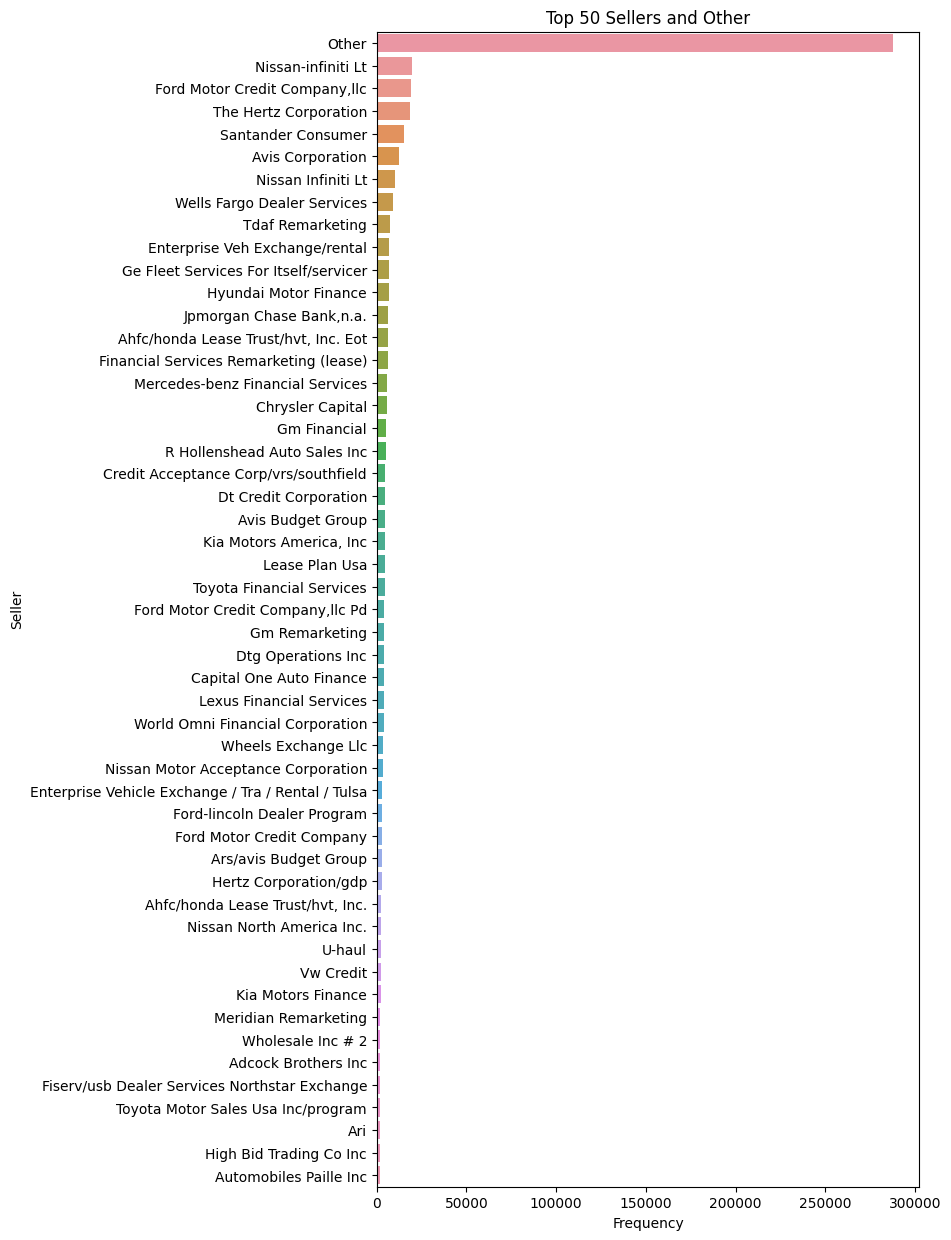

In [1304]:
plt.figure(figsize=(7, 15))

# Selecting the top 50 sellers by frequency
top_50_sellers = car_df['seller'].value_counts().nlargest(50).index.tolist()

# Updating sellers that are not in the top 50 to 'Other' in the DataFrame
car_df['seller'] = car_df['seller'].apply(lambda x: x if x in top_50_sellers else 'Other')

# Plotting the top 50 sellers based on frequency
sns.countplot(y='seller', data=car_df, order=car_df['seller'].value_counts().index)
plt.title('Top 50 Sellers and Other')
plt.xlabel('Frequency')
plt.ylabel('Seller')
plt.show()

Chaning all sellers that are not in the top 50 to 'Other'.

In [1305]:
# Updating sellers that are not in the top 50 to 'Other' in the DataFrame
car_df['seller'] = car_df['seller'].apply(lambda x: x if x in top_50_sellers else 'other')

<div style="position: relative; background: #6d810f; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #6d810f; padding: 5px 10px; border-radius: 3px;">Section 4</span>
    <h1 style="font-size: 30px;">Exploratory Data Analysis</h1>
</div>

In [1306]:
# Selecting numerical columns for basic statistics
numerical_features = ['year', 'odometer', 'mmr', 'sellingprice']

# Calculating basic statistics using describe()
basic_stats = car_df[numerical_features].describe()

# Displaying basic statistics
print("Basic statistics for numerical features:")
print(basic_stats)

Basic statistics for numerical features:
                year       odometer            mmr   sellingprice
count  558610.000000  558610.000000  558610.000000  558610.000000
mean     2010.036911   68340.998015   13764.497324   13607.021781
std         3.966408   53392.174822    9675.211984    9745.275010
min      1982.000000       1.000000      25.000000       1.000000
25%      2007.000000   28398.000000    7100.000000    6900.000000
50%      2012.000000   52270.500000   12250.000000   12100.000000
75%      2013.000000   99122.000000   18300.000000   18200.000000
max      2015.000000  999999.000000  182000.000000  230000.000000


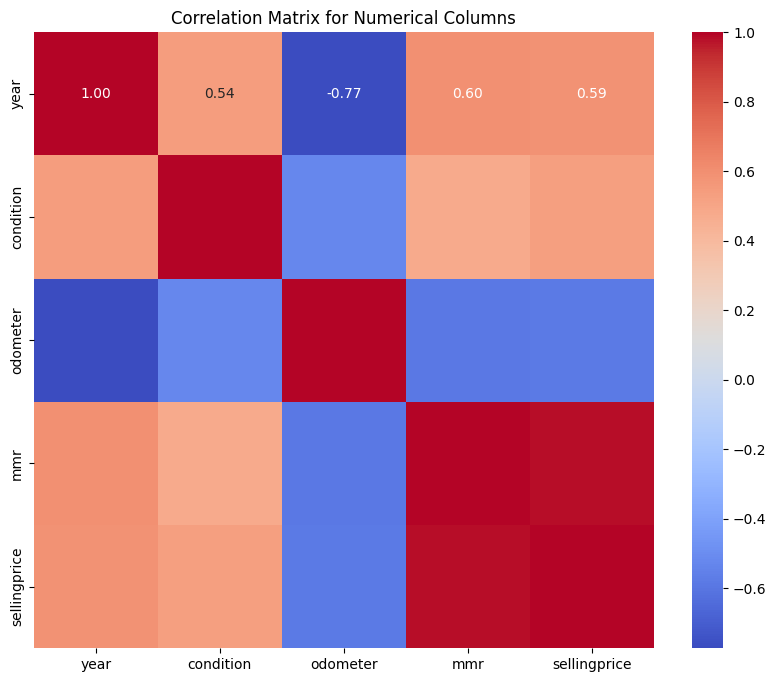

In [1307]:
#Selecting numerical columns
numerical_columns = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

#Creating a correlation matrix
numerical_corr = car_df[numerical_columns].corr()

#Visualising the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

In [1308]:
numerical_corr["sellingprice"].sort_values(ascending=False)

sellingprice    1.000000
mmr             0.983653
year            0.586478
condition       0.532940
odometer       -0.582316
Name: sellingprice, dtype: float64

In [1309]:
# Selecting numerical columns of interest
numerical_columns = ['mmr', 'year', 'condition', 'odometer', 'sellingprice']

# Calculating Pearson correlation
pearson_corr = car_df[numerical_columns].corr(method='pearson')['sellingprice'].sort_values(ascending=False)

# Calculating Spearman correlation
spearman_corr = car_df[numerical_columns].corr(method='spearman')['sellingprice'].sort_values(ascending=False)

print("Pearson correlation of numerical variables with 'sellingprice':")
print(pearson_corr)

print("\nSpearman correlation of numerical variables with 'sellingprice':")
print(spearman_corr)

Pearson correlation of numerical variables with 'sellingprice':
sellingprice    1.000000
mmr             0.983653
year            0.586478
condition       0.532940
odometer       -0.582316
Name: sellingprice, dtype: float64

Spearman correlation of numerical variables with 'sellingprice':
sellingprice    1.000000
mmr             0.979504
year            0.679340
condition       0.611437
odometer       -0.704467
Name: sellingprice, dtype: float64


> #### The correlation coefficients (Pearson and Spearman) between the numerical variables and the 'sellingprice' provide insights into the relationships between these variables:
>
> 1. Pearson Correlation:
>>    - The 'sellingprice' has a very strong positive correlation with 'mmr' (0.984), suggesting a high linear relationship between the maximum retail price ('mmr') and the selling price.
>>
>>    - A moderately positive correlation exists between 'sellingprice' and 'year' (0.586) and 'condition' (0.539). This indicates that newer years and better conditions tend to be associated with higher selling prices, but the relationship is not as strong as with 'mmr'.
>>
>>    - 'Sellingprice' has a moderately negative correlation with 'odometer' (-0.582), implying that as the odometer reading increases (indicating higher mileage), the selling price tends to decrease.
>>
>
> 2. Spearman Correlation:
>>    - The Spearman correlation coefficients show similar trends to the Pearson correlation, but they consider monotonic relationships rather than just linear ones.
>>
>>    - 'mmr' demonstrates a very strong positive monotonic relationship with 'sellingprice' (0.979).
>>
>>    - 'Year', 'condition', and 'odometer' also show relatively strong positive and negative monotonic relationships with 'sellingprice', similar to Pearson correlations but considering non-linear associations.
>>
> Conclusions:
>> - Both Pearson and Spearman correlations indicate that 'mmr' has the strongest association with 'sellingprice', suggesting that the maximum retail price is highly influential in determining the selling price of cars.
>>
>> - 'Year' and 'condition' have moderate positive associations, indicating that newer vehicles in better condition tend to have higher selling prices.
>>
>> - Conversely, 'odometer' (indicating higher mileage) has a moderate negative association, meaning that increased mileage tends to decrease the selling price.
>
> Correlation does not imply causation, and other factors not considered here might influence the selling price of cars. These correlation coefficients provide valuable insights into the relationships between these variables but do not establish causative relationships.

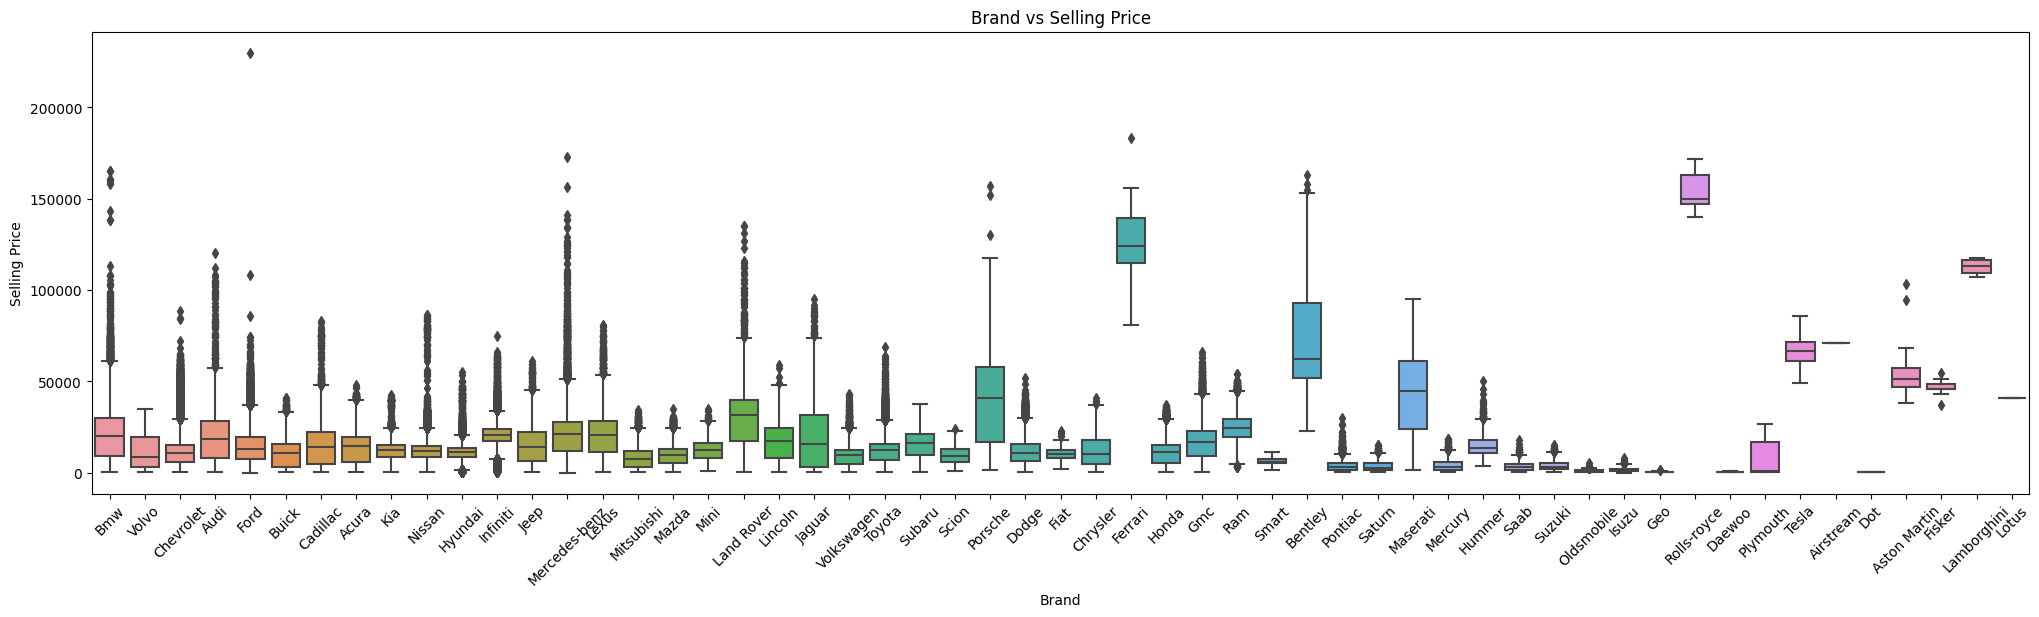

In [1310]:
#Selecting a categorical column ('brand') to visualise its relationship with 'sellingprice'
categorical_column = 'brand'

#Creating a box plot to show 'sellingprice' distribution across different categories of 'brand'
plt.figure(figsize=(25, 6))
sns.boxplot(x=categorical_column, y='sellingprice', data=car_df)
plt.title(f'{categorical_column.capitalize()} vs Selling Price')
plt.xlabel(categorical_column.capitalize())
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

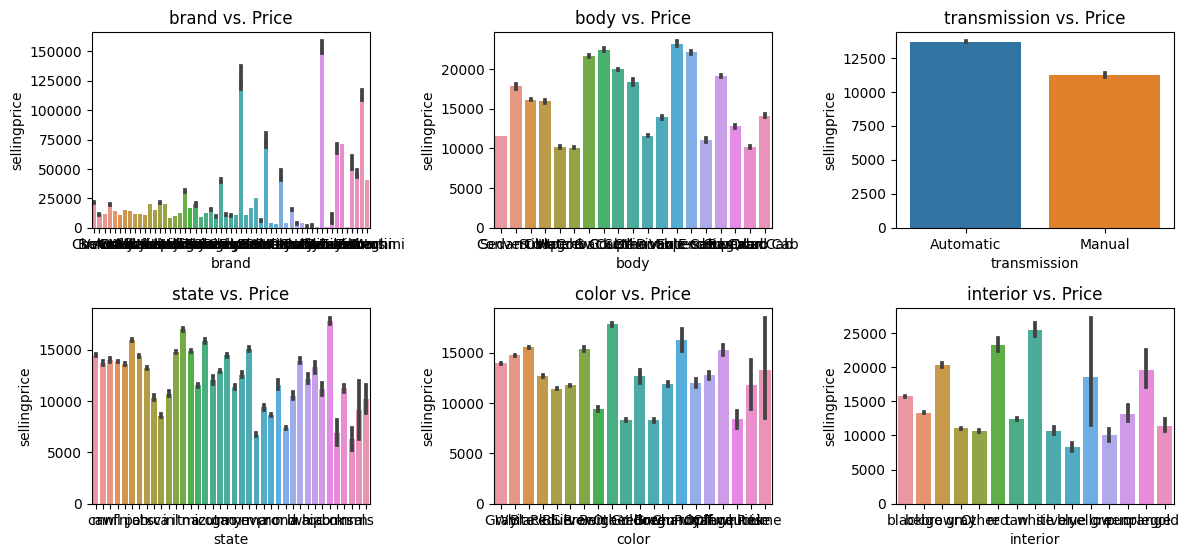

In [1311]:
#Comparing different features to the price
categrical_columns=['brand', 'body', 'transmission', 'state', 'color', 'interior']
plt.figure(figsize=(12,8))
for feature in categrical_columns:
    plt.subplot(3, 3, categrical_columns.index(feature) + 1)
    sns.barplot(data=car_df, x=feature, y='sellingprice')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

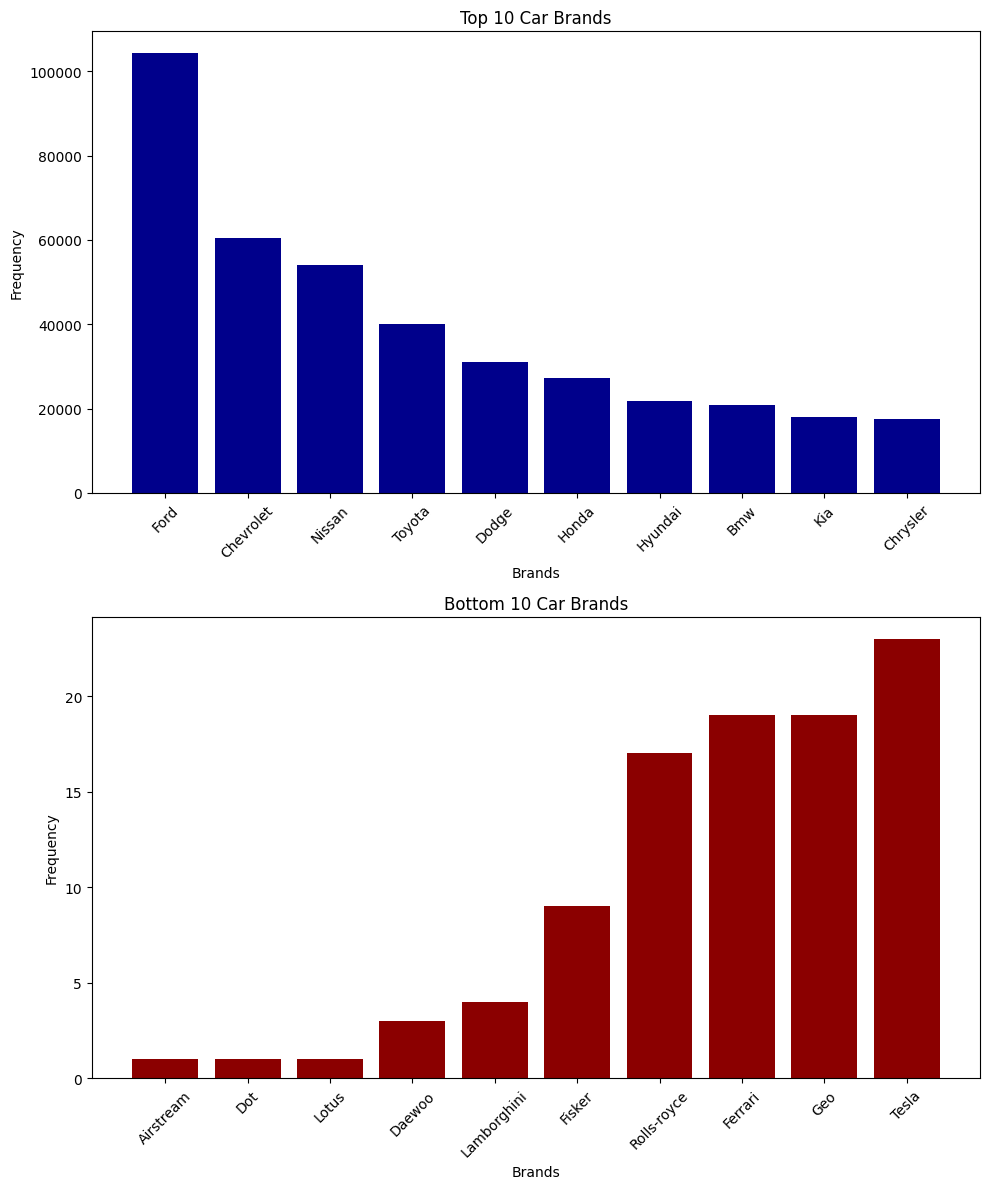

In [1312]:
#Checking the top 10 and bottom 10 cars that are auctioned
top_10_brands = car_df['brand'].value_counts().nlargest(10)
bottom_10_brands = car_df['brand'].value_counts().nsmallest(10)

#Plotting both top 10 and bottom 10 brands in one figure
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

#Plotting the top 10 brands
axes[0].bar(top_10_brands.index, top_10_brands, color='darkblue')
axes[0].set_title('Top 10 Car Brands')
axes[0].set_xlabel('Brands')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

#Plotting the bottom 10 brands
axes[1].bar(bottom_10_brands.index, bottom_10_brands, color='darkred')
axes[1].set_title('Bottom 10 Car Brands')
axes[1].set_xlabel('Brands')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [1313]:
#Count the occurrences of each body type
body_counts = car_df['body'].value_counts()

#Get the top 10 body types
top_10_bodies = body_counts.head(10)

#Sum the counts of the body types not in the top 10
other_count = body_counts[10:].sum()

#Create a DataFrame with the top 10 bodies
top_bodies_df = pd.DataFrame({
    'body': top_10_bodies.index,
    'percent': top_10_bodies.values / len(car_df)
})

#Calculate 'Other' category and create its DataFrame
other_df = pd.DataFrame({'body': ['Other'], 'percent': [other_count / len(car_df)]})

#Concatenate top 10 bodies DataFrame and 'Other' DataFrame
combined_df = pd.concat([top_bodies_df, other_df], ignore_index=True)

#Create the pie chart using Plotly
fig = px.pie(
    combined_df,
    names='body',
    values='percent',
    title='Top 10 Body Types and Others',
    width=600,
    height=500
)

fig.show()

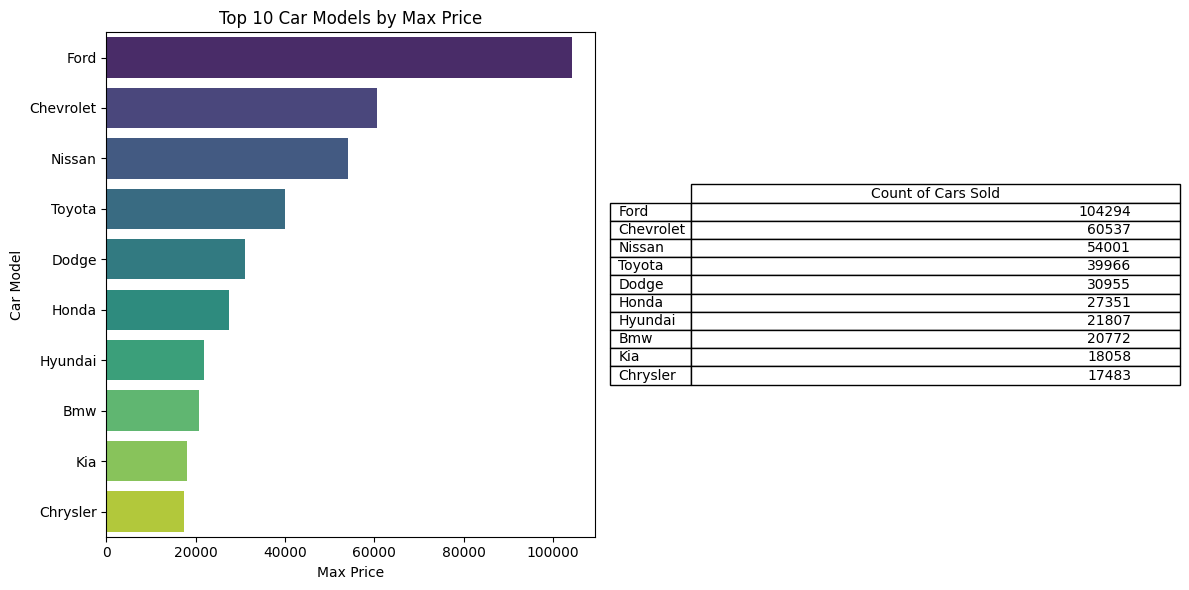

In [1314]:
# Grouping by 'brand' and getting count of cars sold
cars_count = car_df['brand'].value_counts()

# Selecting top 10 car brands based on max selling price
top_car_brands = cars_count.head(10)

# Plotting a bar chart showing max selling price for top 10 car brands
plt.figure(figsize=(12, 6))

# Subplot for the bar chart
plt.subplot(1, 2, 1)
sns.barplot(x=top_car_brands.values, y=top_car_brands.index, palette='viridis')
plt.title('Top 10 Car Models by Max Price')
plt.xlabel('Max Price')
plt.ylabel('Car Model')

# Subplot for the table showing count of cars sold
plt.subplot(1, 2, 2)
plt.table(cellText=top_car_brands.values.reshape(-1, 1), 
          rowLabels=top_car_brands.index, 
          colLabels=['Count of Cars Sold'], 
          loc='center')
plt.axis('off')  # Hide axis for the table

plt.tight_layout()
plt.show()

In [1315]:
# Performing ANOVA for 'brand' and 'sellingprice'
model = ols('sellingprice ~ C(brand)', data=car_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq        df          F  PR(>F)
C(brand)  1.051614e+13      54.0  2557.2908     0.0
Residual  4.253518e+13  558555.0        NaN     NaN


> #### The ANOVA test results show a strong relationship between the vehicle brands and their selling prices. The p-value of nearly zero indicates a significant difference in selling prices across different brands. In essence, the brand of a vehicle significantly influences its selling price in the market.

In [1316]:
# Performing ANOVA for 'brand' and 'sellingprice'
model = ols('sellingprice ~ C(body)', data=car_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq        df            F  PR(>F)
C(body)   5.380135e+12      18.0  3502.343536     0.0
Residual  4.767118e+13  558591.0          NaN     NaN


In [1317]:
# Performing ANOVA for 'brand' and 'sellingprice'
model = ols('sellingprice ~ C(transmission)', data=car_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                       sum_sq        df          F         PR(>F)
C(transmission)  1.039384e+11       1.0  1096.5763  3.139404e-240
Residual         5.294737e+13  558608.0        NaN            NaN


In [1318]:
# Performing ANOVA for 'brand' and 'sellingprice'
model = ols('sellingprice ~ C(state)', data=car_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq        df           F  PR(>F)
C(state)  2.695899e+12      37.0  808.230012     0.0
Residual  5.035541e+13  558572.0         NaN     NaN


In [1319]:
# Performing ANOVA for 'brand' and 'sellingprice'
model = ols('sellingprice ~ C(color)', data=car_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq        df            F  PR(>F)
C(color)  2.425221e+12      19.0  1408.369156     0.0
Residual  5.062609e+13  558590.0          NaN     NaN


In [1320]:
# Performing ANOVA for 'brand' and 'sellingprice'
model = ols('sellingprice ~ C(interior)', data=car_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                   sum_sq        df            F  PR(>F)
C(interior)  3.164952e+12      14.0  2531.362649     0.0
Residual     4.988636e+13  558595.0          NaN     NaN
